In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random 
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

## IMPORTING THE DATASETS  : 

In [5]:
X_train   = np.loadtxt("input.csv" , delimiter = ",")
X_test  = np.loadtxt("input_test.csv" , delimiter = ",")

Y_train = np.loadtxt("labels.csv" , delimiter = ",").reshape 
Y_test = np.loadtxt("labels_test.csv" , delimiter = ",")

###  PRINTING THE SHAPERS OF OUR TRAINING DATA AND TEST DATA  : 


In [6]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 30000)
(400, 30000)
(2000,)
(400,)


### Reshaping our datasets : 


In [10]:
X_train = X_train.reshape(len(X_train) , 100,100,3)/255.0
Y_train = Y_train.reshape(len(Y_train) , 1)
X_test = X_test.reshape(len(X_test) , 100,100,3)/255.0
Y_test = Y_test.reshape(len(Y_test) , 1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)
(2000, 1)
(400, 1)


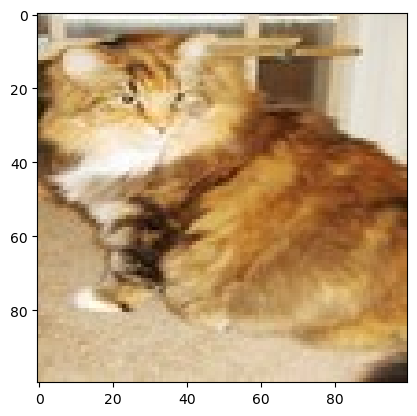

In [18]:
np.random.seed(42)
index  = random.randrange(0 ,X_train.shape[0] )
plt.imshow(X_train[index , :].reshape(100,100,3))

# Model : 

In [28]:
model  = Sequential([
    Conv2D(32 , (3,3) , activation='relu' , input_shape = (100,100,3)), 
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3)  ,  activation = "relu"),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dense(64 , activation = "relu"),
    Dense(1 ,activation="sigmoid")
    
])

In [29]:
model.compile(loss = "binary_crossentropy" , optimizer ="adam" , metrics=["accuracy"]) 

In [31]:
model.fit(X_train , Y_train ,batch_size =64, epochs=8  )

Epoch 1/8
32/32 [==============================] - 15s 466ms/step - loss: 0.4984 - accuracy: 0.7680
Epoch 2/8
32/32 [==============================] - 14s 440ms/step - loss: 0.4622 - accuracy: 0.7830
Epoch 3/8
32/32 [==============================] - 14s 443ms/step - loss: 0.4153 - accuracy: 0.8230
Epoch 4/8
32/32 [==============================] - 14s 442ms/step - loss: 0.4552 - accuracy: 0.7835
Epoch 5/8
32/32 [==============================] - 15s 479ms/step - loss: 0.3623 - accuracy: 0.8430
Epoch 6/8
32/32 [==============================] - 15s 458ms/step - loss: 0.3157 - accuracy: 0.8695
Epoch 7/8
32/32 [==============================] - 14s 437ms/step - loss: 0.2901 - accuracy: 0.8745
Epoch 8/8
32/32 [==============================] - 15s 455ms/step - loss: 0.2459 - accuracy: 0.9055


the prediction bases on our model is : cat


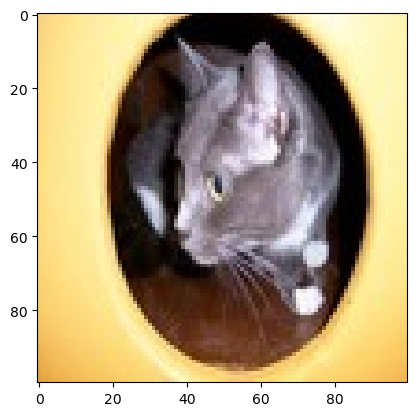

In [48]:
index1  = random.randint(0 , Y_test.shape[0])
plt.imshow(X_test[index1, :].reshape(100,100,3))
prediction = model.predict(X_test[index1, :].reshape(1,100,100,3))
prediction =  prediction > 0.5

if prediction == 0 : 
    pred = "Dog"
else : 
    pred = "cat" 
    
print("the prediction bases on our model is : " + pred)